# MNIST Classification

In [1]:
#Import Required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

1.2) Load MNIST Dataset

In [2]:
# training data
#prepare dataset
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Create 5 hidden layers with 1024 neurons and he_normal as the kernel initializer for each hidden layer.

In [3]:
# Create the model

#Input layer
x = tf.placeholder(tf.float32, [None, 784])

#hidden layer 1
h1= tf.layers.dense(x,1024, kernel_initializer="he_normal")
h1_1=tf.nn.relu(h1)

#hidden layer 2
h2 = tf.layers.dense(h1_1,1024,kernel_initializer="he_normal")
h2_1=tf.nn.relu(h2)

#hidden layer 3
h3 = tf.layers.dense(h2_1,1024,kernel_initializer="he_normal")
h3_1=tf.nn.relu(h3)

#hidden layer 4
h4 = tf.layers.dense(h3_1,1024,kernel_initializer="he_normal")
h4_1=tf.nn.relu(h4)

#hidden layer 5
h5 = tf.layers.dense(h4_1,1024,kernel_initializer="he_normal")
h5_1=tf.nn.relu(h5)

#output layer
y = tf.layers.dense(h5_1,10)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Create a placeholder for the output. We use softmax cross entropy to calculate the loss and use Adam Optimizer with a learning rate of 0.001 to achieve 98% accuracy.

In [23]:
# Define loss and optimizer
y_ = tf.placeholder(tf.int64, [None,10])
cross_entropy = tf.losses.softmax_cross_entropy(onehot_labels=y_, logits=y)
train_step = tf.train.AdamOptimizer(0.001).minimize(cross_entropy)
loss_log = []

#intialize tensorflow global variables
init = tf.global_variables_initializer()

#number of epochs, breaks when accuracy reaches 98
epochs=200



1.1) Traning the fully connected NN to achieve 98% accuracy

In [32]:
#run graph as session
sess=tf.Session()
sess.run(init) 
loss_log=[]
#batch size
batches=int(len(mnist.train.labels)/550)
epoch_plot=[]
#train model
for epoch in range(epochs):
    epoch_plot.append(epoch)
    print("Epoch: ",epoch)
    for _ in range(batches):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        loss,_ = sess.run([cross_entropy,train_step], feed_dict={x: batch_xs, y_: batch_ys})
    loss_log.append(loss)
    correct_prediction = tf.equal(tf.argmax(y, 1),tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    accuracy_result = sess.run(accuracy, feed_dict={x: mnist.test.images,y_: mnist.test.labels})
    print("accucracy is",accuracy_result*100)
    if accuracy_result*100>98:
        break
    print("Loss:",loss)
# Test trained model on training dataset  
correct_prediction = tf.equal(tf.argmax(y, 1),tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
accuracy_result = sess.run(accuracy, feed_dict={x: mnist.test.images,y_: mnist.test.labels})
print("accucracy is",accuracy_result*100)


Epoch:  0
accucracy is 93.14000010490417
Loss: 0.28863242
Epoch:  1
accucracy is 94.41999793052673
Loss: 0.28718296
Epoch:  2
accucracy is 95.7099974155426
Loss: 0.12080989
Epoch:  3
accucracy is 94.84999775886536
Loss: 0.08802515
Epoch:  4
accucracy is 96.52000069618225
Loss: 0.13580582
Epoch:  5
accucracy is 96.20000123977661
Loss: 0.10023464
Epoch:  6
accucracy is 97.00999855995178
Loss: 0.03533344
Epoch:  7
accucracy is 96.74000144004822
Loss: 0.34895608
Epoch:  8
accucracy is 96.7199981212616
Loss: 0.08110574
Epoch:  9
accucracy is 97.10999727249146
Loss: 0.09994206
Epoch:  10
accucracy is 95.95000147819519
Loss: 0.046273578
Epoch:  11
accucracy is 97.14000225067139
Loss: 0.18630444
Epoch:  12
accucracy is 97.5600004196167
Loss: 0.029852878
Epoch:  13
accucracy is 97.28999733924866
Loss: 0.12459107
Epoch:  14
accucracy is 96.95000052452087
Loss: 0.041392297
Epoch:  15
accucracy is 97.39999771118164
Loss: 0.011369456
Epoch:  16
accucracy is 97.06000089645386
Loss: 0.013723013
Epoch

1.3) Feed forward on 1000 test images

Here, I picked the top 10 probabilties of each dimension and plotted them according to their labels.

The plot of the output layer seems to have correctly classified all the images in their corresponding clusters showing us that the model seems to have learned well. 

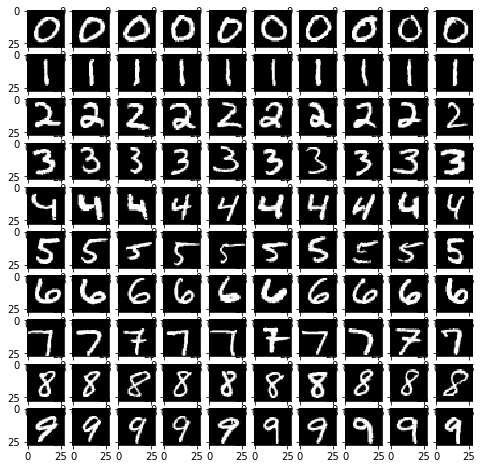

In [33]:
test_output=sess.run(y,feed_dict={x: mnist.test.images[:1000]})
#print(test_output.shape)
temp=test_output[:,0]
# print(temp.shape)
#print (np.argsort(temp)[-10:][::-1])
indices=[]
for i in range(len(test_output[1])):
    temp=test_output[:,i]
    indices.append(np.argsort(temp)[-10:][::-1])

plt.figure(figsize=(8,8))

for i in range(10):
    for j in range(10):
        ax = plt.subplot2grid((10,10),(i,j))
        ax.imshow(np.reshape(mnist.test.images[indices[i][j]], [28, 28]), cmap='gray')
plt.show()

1.4) Feed forward on second last layer

Here, from the 1024 columns, I picked 10 at random and performed a similar procedure as in 1.3. 

The output of the second last layer shows us that there are some non interesting/empty neurons. When we pick 10 random dimensions and then the top 10 values from them, there is a possibility that the neurons might get picked from these non interesting neurons which end up as empty rows in the plot. This is ideal because as the model reaches the latter parts of the hidden layers, it doesn't require as many as 1024 neurons to learn about the data. In an ideal case, the activation of certain neurons will lead to choose certain labels in the output of the network.

97


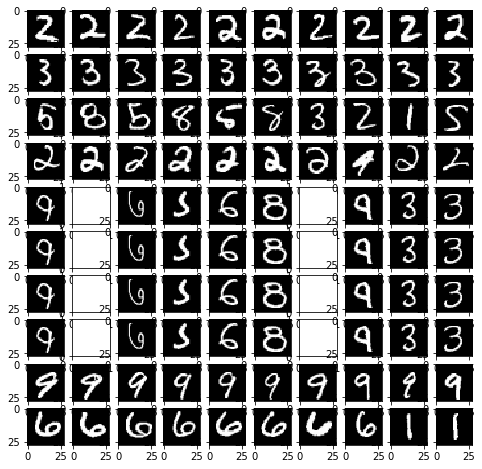

In [37]:
second_last_output=sess.run(h5_1,feed_dict={x: mnist.test.images[:1000]})
#print(second_last_output.shape)
np.random.seed(565)
idx = np.random.randint(1024, size=10)
#print(idx)
temp = second_last_output[:,idx]
count=0

#check if there are any columns with sum=0, i.e. empty.
for i in range(temp.shape[0]):
    if sum(temp[i])==0:
        count+=1
print(count)
#print(temp.shape)
indices=[]
for i in range(len(temp[1])):
    temp_1=temp[:,i]
    indices.append(np.argsort(temp_1)[-10:][::-1])
    #print(temp_1.shape)
    
#print("indices",indices)
plt.figure(figsize=(8,8))

for i in range(10):
    for j in range(10):
        ax = plt.subplot2grid((10,10),(i,j))
        if sum(temp[indices[i][j]])!=0:
            ax.imshow(np.reshape(mnist.test.images[indices[i][j]], [28, 28]), cmap='gray')
plt.show()

1.5) PCA and TNSE

In [38]:
def TNSE(data,labels, layer):
    temp_tnse = TSNE(n_components=2).fit_transform(data)
    scatter=plt.scatter(temp_tnse[:,0],temp_tnse[:,1], c = labels, label = set(labels),cmap=plt.cm.get_cmap('Paired', 10) )
    plt.legend(*scatter.legend_elements(),
                     title="Classes",loc='center left', bbox_to_anchor=(1, 0.5))
    #https://stackoverflow.com/questions/57939655/how-to-add-label-over-mean-of-points-in-scatterplot/57939926#57939926
    for i in range(10):
        lblxy = np.mean(temp_tnse[labels==i], 0)
        plt.text(*lblxy, i, ha='center', va='center', fontsize=20)
    plt.title('TNSE')
    print("Layer:",layer)
    plt.show()
    

In [39]:
def PCA_1(data, labels, layer):
    temp_PCA = PCA(n_components=2).fit_transform(data)
    scatter = plt.scatter(temp_PCA[:,0],temp_PCA[:,1], c = labels, label= set(labels),cmap=plt.cm.get_cmap('Paired', 10) )
    plt.legend(*scatter.legend_elements(),
                     title="Classes",loc='center left', bbox_to_anchor=(1, 0.5))
    #https://stackoverflow.com/questions/57939655/how-to-add-label-over-mean-of-points-in-scatterplot/57939926#57939926
    for i in range(10):
        lblxy = np.mean(temp_PCA[labels==i], 0)
        plt.text(*lblxy, i, ha='center', va='center',fontsize=20)
    plt.title('PCA')
    print("Layer:",layer)
    plt.show()

1.6) PCA and TNSE on test images

By looking at the TNSE on test set, we can see that the classes are more seperable except for classes 4 and 9.

While that of the PCA looks more cluttered and not easily seperable. 

Layer: Test


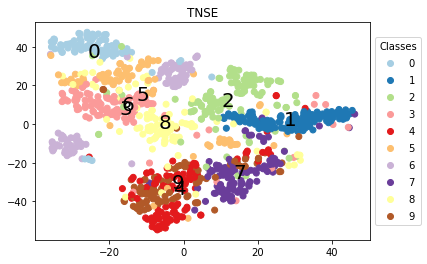

Layer: Test


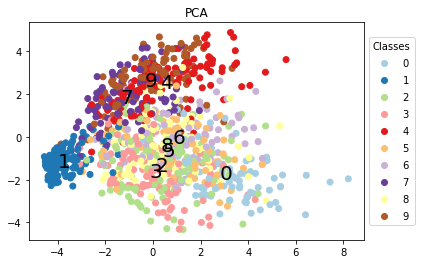

In [40]:
test = mnist.test.images[:1000]
mnist.test.cls = np.argmax(mnist.test.labels, axis=1)
labels=mnist.test.cls
labels = labels[:1000]
TNSE(test,labels, "Test")
PCA_1(test,labels, "Test")

For the plots of TNSE of all the layers, we can see that as we go from first layer to the last layer, the classes are well clustered and the data is more compact.

Layer: 1


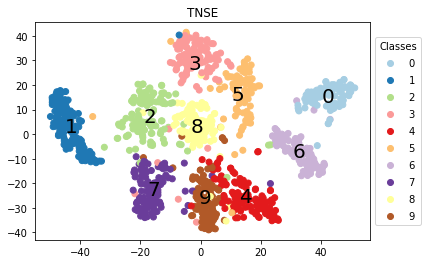

Layer: 2


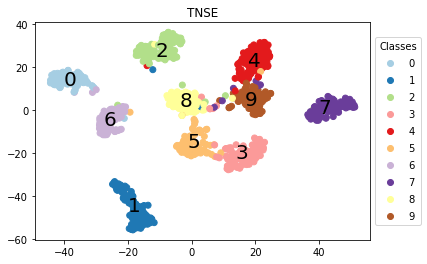

Layer: 3


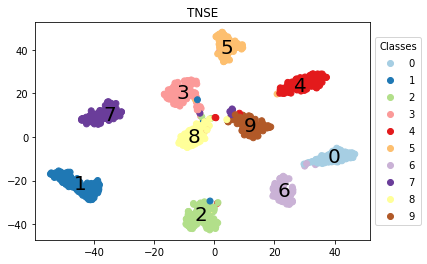

Layer: 4


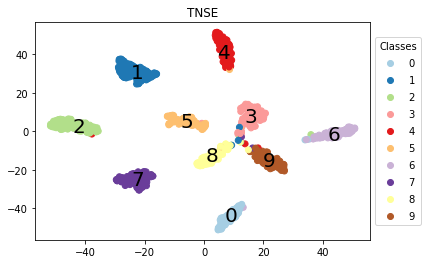

Layer: 5


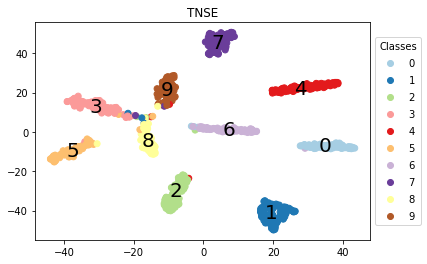

In [41]:
layers = [h1_1,h2_1,h3_1,h4_1,h5_1]

for i in range(len(layers)):
    temp_layer=sess.run(layers[i],feed_dict={x: mnist.test.images[:1000]})
    TNSE(temp_layer,labels,i+1)

The plots of PCA for the layers show us that the data seperates out a bit but it is not as distinguishable and coherent as compared to TNSE. 

Layer: 1


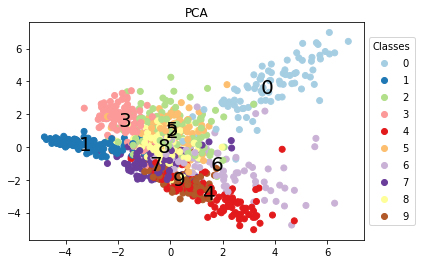

Layer: 2


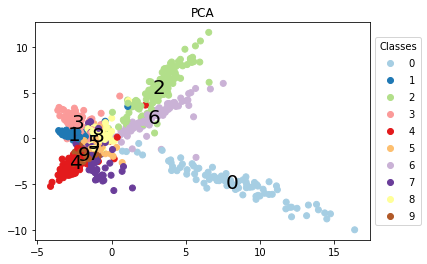

Layer: 3


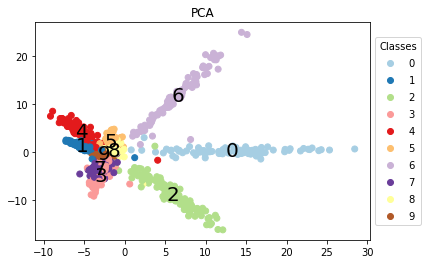

Layer: 4


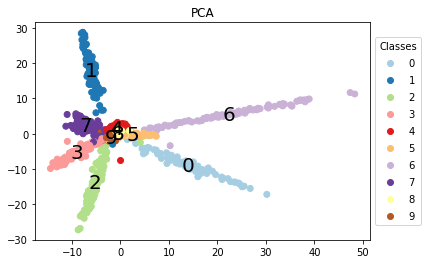

Layer: 5


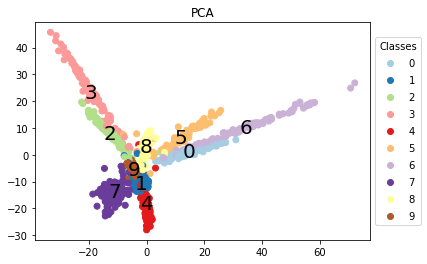

In [42]:
layers = [h1_1,h2_1,h3_1,h4_1,h5_1]

for i in range(len(layers)):
    temp_layer=sess.run(layers[i],feed_dict={x: mnist.test.images[:1000]})
    PCA_1(temp_layer,labels,i+1)

In [43]:
sess.close()